# **Importing libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn . preprocessing import StandardScaler
from sklearn . cluster import KMeans
from sklearn . metrics import silhouette_score
pd.set_option("display.max_column", None)

# Loading data



In [6]:
df = pd.read_csv(r'/Users/prashanth45/Downloads/Ecommerce_Consumer_Behavior_Analysis_Data (2).csv')

# **Understanding the data**

In [8]:
df = pd.read_csv(r'/Users/prashanth45/Downloads/Ecommerce_Consumer_Behavior_Analysis_Data (2).csv')

**Column names**

In [10]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

**First few rows**

In [12]:
(df.head())

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


**Missing values**

In [14]:
(df.isnull().sum())

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

**Outlier detection**

In [16]:
numeric_cols = ['Age','Purchase_Amount','Frequency_of_Purchase','Product_Rating','Return_Rate','Customer_Satisfaction','Time_to_Decision']

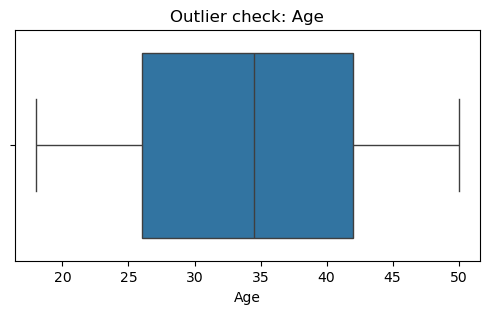

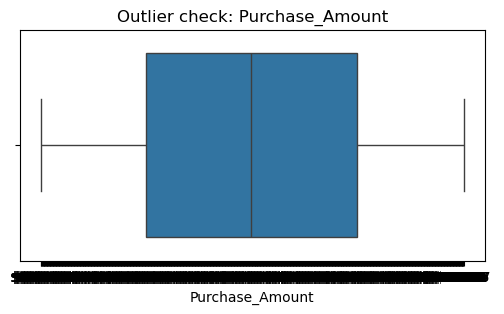

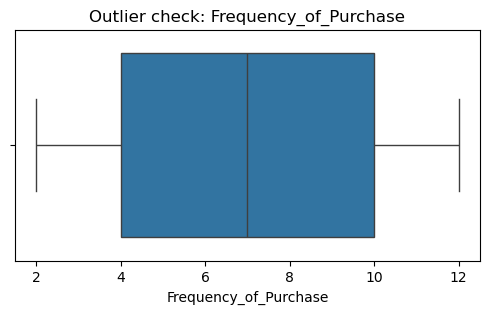

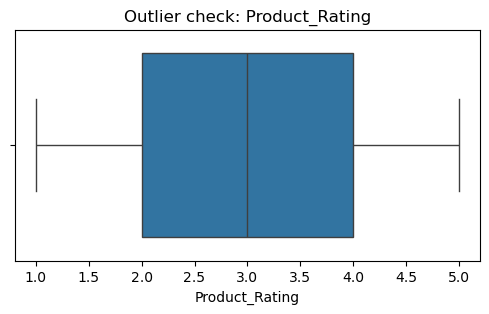

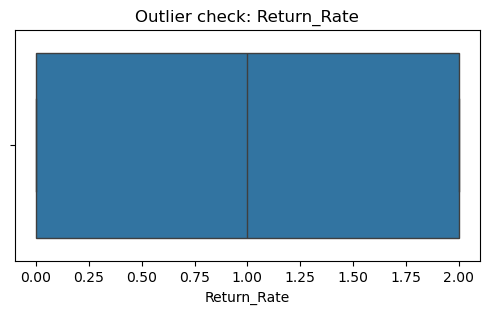

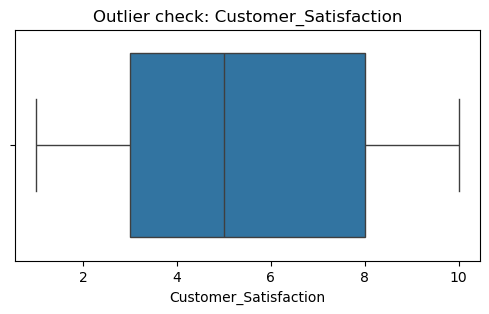

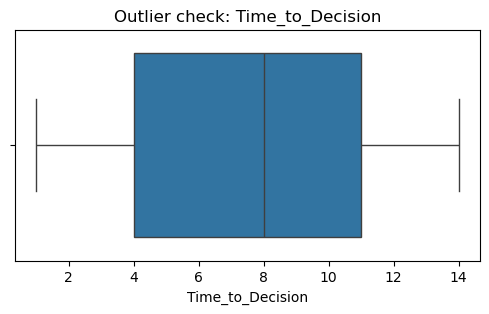

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier check: {col}')
    plt.show()

**Removing outliers**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [20]:
df['Purchase_Amount'] = (
    df['Purchase_Amount'].replace('[\$,]', '', regex=True)
               .apply(lambda x: x.strip() if isinstance(x, str) else x)
)

df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce').fillna(0).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_11445/2064359187.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Purchase_Amount'].replace('[\$,]', '', regex=True)


In [21]:
Q1 = df['Purchase_Amount'].quantile(0.25)
Q3 = df['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Purchase_Amount'] >= Q1 - 1.5 * IQR) & (df['Purchase_Amount'] <= Q3 + 1.5 * IQR)]

**Duplicates**

In [23]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [24]:
(df.duplicated().sum())

0

**Data types**

In [26]:
(df.dtypes)

Customer_ID                               object
Age                                        int64
Gender                                    object
Income_Level                              object
Marital_Status                            object
Education_Level                           object
Occupation                                object
Location                                  object
Purchase_Category                         object
Purchase_Amount                          float64
Frequency_of_Purchase                      int64
Purchase_Channel                          object
Brand_Loyalty                              int64
Product_Rating                             int64
Time_Spent_on_Product_Research(hours)    float64
Social_Media_Influence                    object
Discount_Sensitivity                      object
Return_Rate                                int64
Customer_Satisfaction                      int64
Engagement_with_Ads                       object
Device_Used_for_Shop

**unique values per column**

In [28]:
(df.nunique())

Customer_ID                              1000
Age                                        33
Gender                                      8
Income_Level                                2
Marital_Status                              4
Education_Level                             3
Occupation                                  2
Location                                  969
Purchase_Category                          24
Purchase_Amount                           989
Frequency_of_Purchase                      11
Purchase_Channel                            3
Brand_Loyalty                               5
Product_Rating                              5
Time_Spent_on_Product_Research(hours)      12
Social_Media_Influence                      3
Discount_Sensitivity                        3
Return_Rate                                 3
Customer_Satisfaction                      10
Engagement_with_Ads                         3
Device_Used_for_Shopping                    3
Payment_Method                    

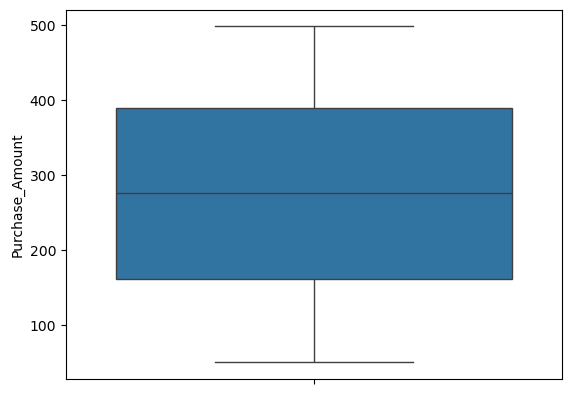

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df['Purchase_Amount'])
plt.show()

**Descriptive Statistics**

In [31]:
df.describe()

,Age,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,275.063880,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,131.532998,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,50.710000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,162.235000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,276.165000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,388.982500,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,498.330000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


**categorical**

In [33]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())


Value counts for Customer_ID:

Customer_ID
37-611-6911    1
82-692-9306    1
88-395-8741    1
06-638-0433    1
84-208-7045    1
              ..
09-443-7536    1
27-463-5671    1
53-380-3968    1
42-969-0735    1
48-203-9118    1
Name: count, Length: 1000, dtype: int64

Value counts for Gender:

Gender
Female         452
Male           449
Bigender        20
Agender         19
Genderfluid     17
Non-binary      16
Polygender      15
Genderqueer     12
Name: count, dtype: int64

Value counts for Income_Level:

Income_Level
High      515
Middle    485
Name: count, dtype: int64

Value counts for Marital_Status:

Marital_Status
Widowed     260
Married     253
Divorced    245
Single      242
Name: count, dtype: int64

Value counts for Education_Level:

Education_Level
Bachelor's     341
High School    331
Master's       328
Name: count, dtype: int64

Value counts for Occupation:

Occupation
High      517
Middle    483
Name: count, dtype: int64

Value counts for Location:

Location
Oslo    

**Customer segmentation-RECENCY,MONETORY**

In [35]:
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], format='mixed')

latest_date = df['Time_of_Purchase'].max()

rfm = df.groupby('Customer_ID').agg({
    'Time_of_Purchase': lambda x: (latest_date - x.max()).days,
    'Purchase_Amount': 'sum'
}).reset_index()

rfm.columns = ['Customer_ID', 'Recency', 'Monetary']


rfm['Frequency'] = df.groupby('Customer_ID').size().reset_index(name='Frequency')['Frequency']

In [36]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm['Customer_Tier'] = rfm['RFM_Segment'].apply(lambda x: 'Champions' if x >= '444' else 'Others')

In [37]:
#SHOWING FIRST ROWS
rfm.head()
rfm['RFM_Segment'].value_counts().head(10)

RFM_Segment
155    16
242    15
444    14
233    14
533    14
322    14
541    13
521    13
434    13
115    13
Name: count, dtype: int64

In [38]:
# Prints the entire DataFrame
print(rfm)

rfm['RFM_Segment'].value_counts().head(10)

     Customer_ID  Recency  Monetary  Frequency R_Score F_Score M_Score  \
0    00-107-4749      102    178.04          1       4       1       2   
1    00-149-4481      330    464.76          1       1       1       5   
2    00-264-3797      257    128.01          1       2       1       1   
3    00-265-0556       59     68.02          1       5       1       1   
4    00-275-9990      185    302.74          1       3       1       3   
..           ...      ...       ...        ...     ...     ...     ...   
995  99-509-4653      196    298.32          1       3       5       3   
996  99-581-5577       74    422.92          1       5       5       5   
997  99-643-9845      112    137.75          1       4       5       1   
998  99-771-9310      298    399.95          1       1       5       4   
999  99-945-7193      244    254.29          1       2       5       3   

    RFM_Segment Customer_Tier  
0           412        Others  
1           115        Others  
2           211

RFM_Segment
155    16
242    15
444    14
233    14
533    14
322    14
541    13
521    13
434    13
115    13
Name: count, dtype: int64

# **Visualization of customer segmentation**

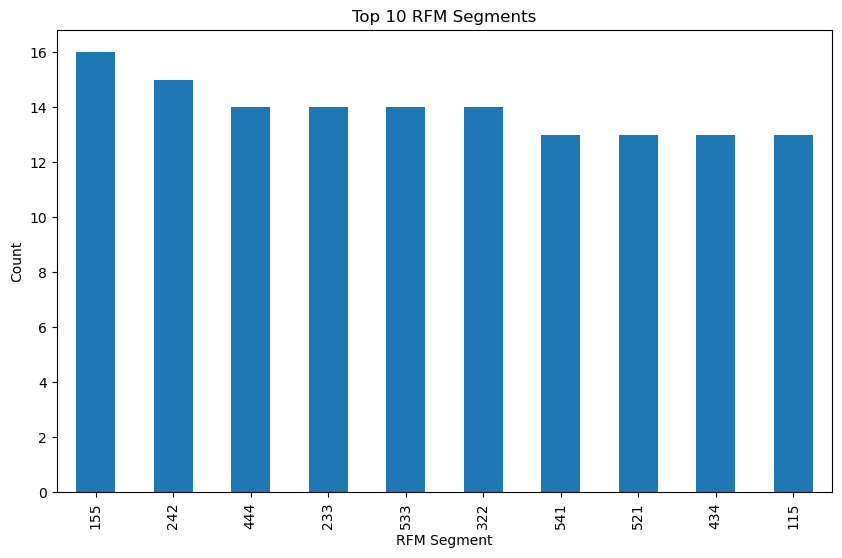

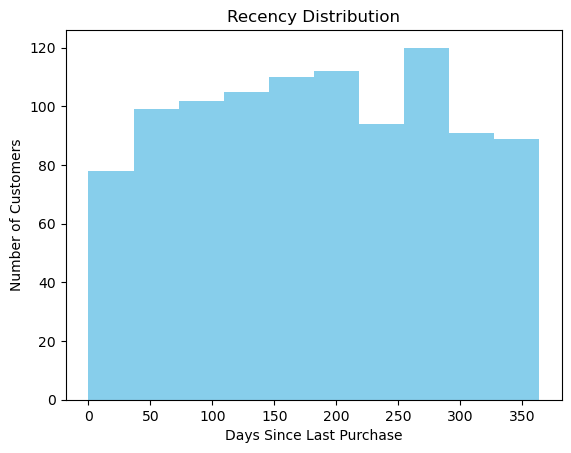

In [40]:
import matplotlib.pyplot as plt
rfm['RFM_Segment'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.show()

# Example: Histogram of Recency
plt.hist(rfm['Recency'], bins=10, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

# **FEATURE ENGINEERING**

In [42]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,2024-03-01,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,2024-04-16,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,2024-03-15,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,2024-10-04,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,2024-01-30,False,False,Wants-based,No Preference,4


In [43]:
df['Engagement_Score'] = (
    df['Time_Spent_on_Product_Research(hours)'] * 0.4 +
    df['Social_Media_Influence'].notnull().astype(int) * 0.3 +
    df['Engagement_with_Ads'].notnull().astype(int) * 0.3
)

**HIGH VALUE CUSTOMER FLAG**

In [45]:
df['High_Value_Customer'] = np.where(df['Purchase_Amount'] > df['Purchase_Amount'].median(), 1, 0)

**COMBINE RELATED BEAHAVIOUR FEATURES**

In [47]:
df['Overall_Satisfaction'] = (df['Customer_Satisfaction'] + df['Product_Rating']) / 2

df['Customer_Loyalty_Program_Member'] = df['Customer_Loyalty_Program_Member'].astype(int)

**ENCODE CATEGORICAL COLUMN**

**SCALING NUMERIC COLUMNS**

# **VISUALIZATION**

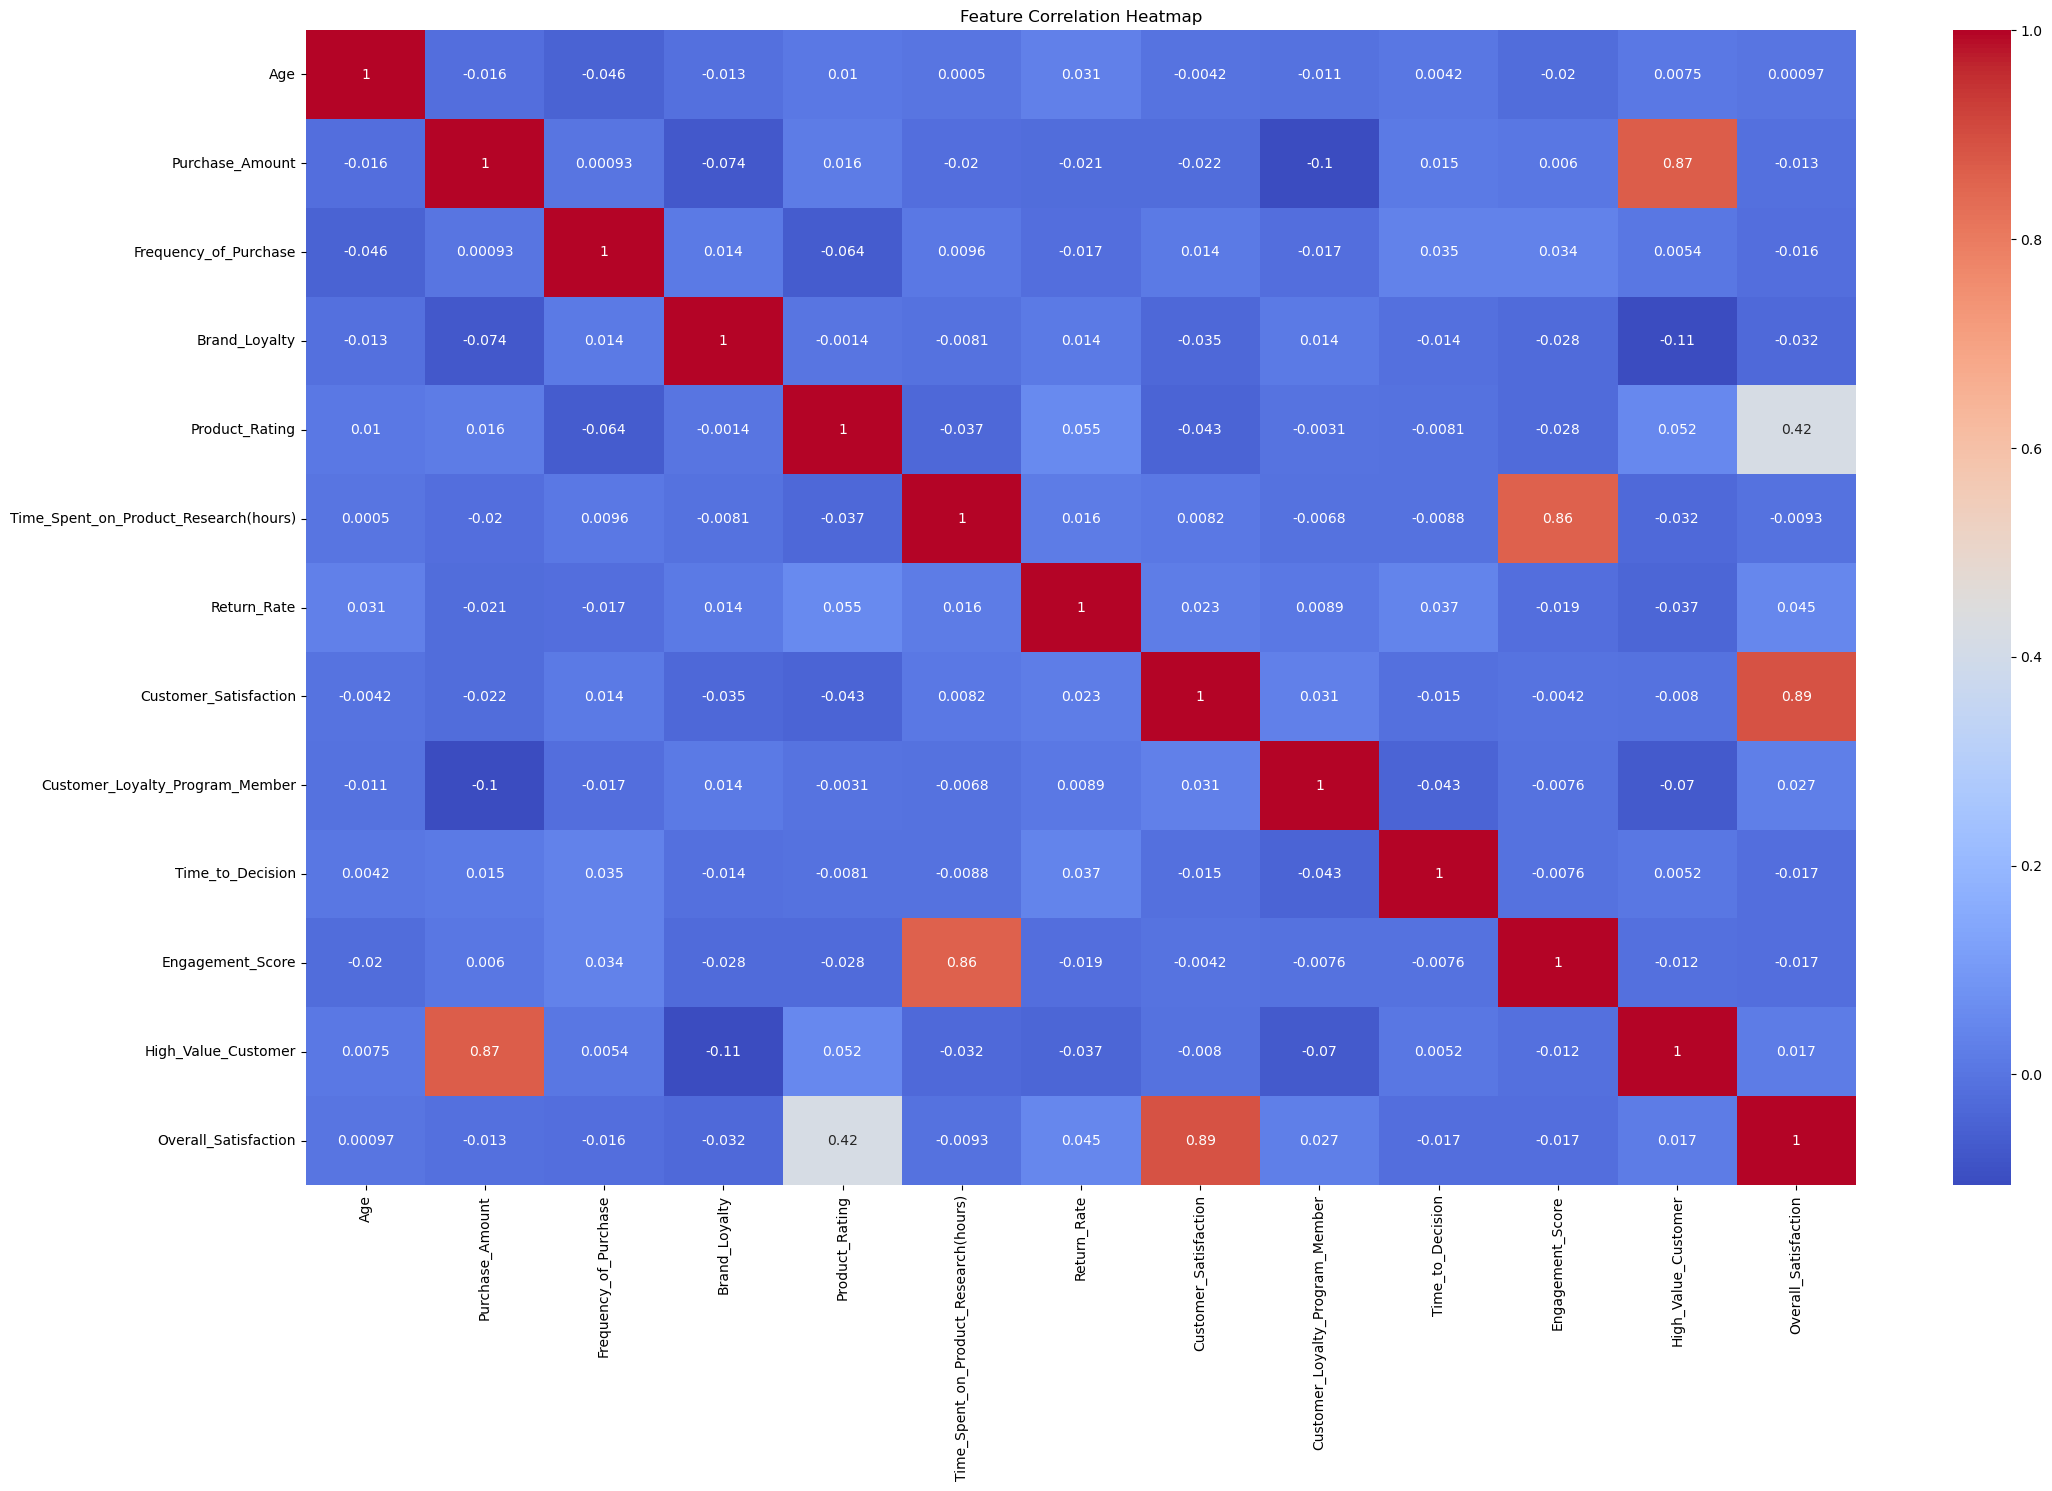

In [51]:
plt.figure(figsize=(25,15))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

**SALES**

In [53]:
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'], errors='coerce')


In [54]:
df['Hour'] = df['Time_of_Purchase'].dt.hour
df['Day'] = df['Time_of_Purchase'].dt.day
df['Month'] = df['Time_of_Purchase'].dt.month
df['Day_Name'] = df['Time_of_Purchase'].dt.day_name()

In [55]:
sales_by_hour = df.groupby('Day_Name')['Purchase_Amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

**Visualization of sales by hour**

In [57]:
df['Hour'].value_counts()

Hour
0    1000
Name: count, dtype: int64

In [58]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Engagement_Score,High_Value_Customer,Overall_Satisfaction,Hour,Day,Month,Day_Name
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,2024-03-01,True,0,Need-based,No Preference,2,0.80,1,6.0,0,1,3,Friday
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,2024-04-16,True,0,Wants-based,Standard,6,1.40,0,3.0,0,16,4,Tuesday
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,2024-03-15,True,1,Impulsive,No Preference,3,0.72,1,6.0,0,15,3,Friday
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,2024-10-04,True,1,Need-based,Express,10,0.70,0,1.0,0,4,10,Friday
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,2024-01-30,False,0,Wants-based,No Preference,4,0.30,0,7.0,0,30,1,Tuesday


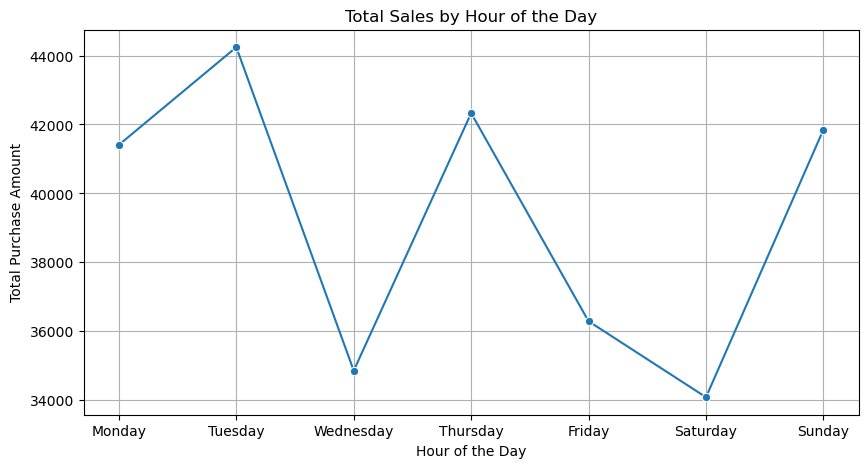

In [59]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sales_by_hour, x='Day_Name', y='Purchase_Amount', marker='o')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

**DAY OF THE WEEK**

In [61]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Engagement_Score,High_Value_Customer,Overall_Satisfaction,Hour,Day,Month,Day_Name
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,2024-03-01,True,0,Need-based,No Preference,2,0.80,1,6.0,0,1,3,Friday
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,2024-04-16,True,0,Wants-based,Standard,6,1.40,0,3.0,0,16,4,Tuesday
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,2024-03-15,True,1,Impulsive,No Preference,3,0.72,1,6.0,0,15,3,Friday
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,2024-10-04,True,1,Need-based,Express,10,0.70,0,1.0,0,4,10,Friday
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,2024-01-30,False,0,Wants-based,No Preference,4,0.30,0,7.0,0,30,1,Tuesday


In [62]:
import warnings
warnings.filetrwarnings="ignore"

/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_11445/1576565178.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='Day_Name', y='Purchase_Amount', palette='viridis')


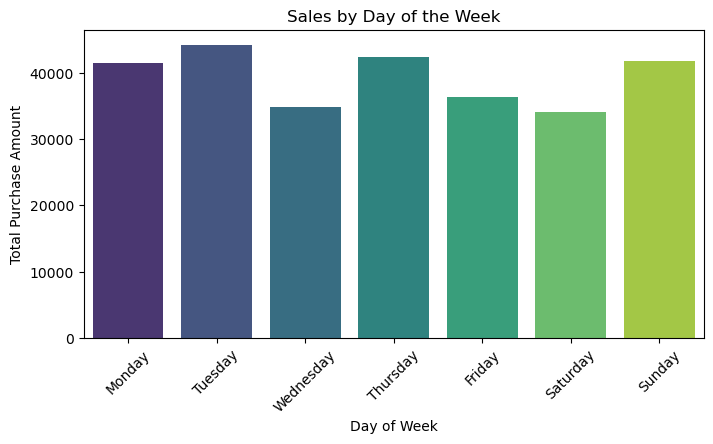

In [63]:
sales_by_day = df.groupby('Day_Name')['Purchase_Amount'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=sales_by_day, x='Day_Name', y='Purchase_Amount', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

**SALES TREND BY MONTH**

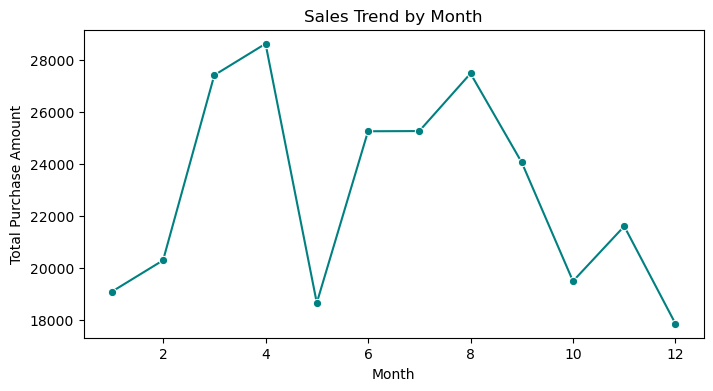

In [65]:
sales_by_month = df.groupby('Month')['Purchase_Amount'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=sales_by_month, x='Month', y='Purchase_Amount', marker='o', color='teal')
plt.title('Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.show()

# **DASHBOARD**

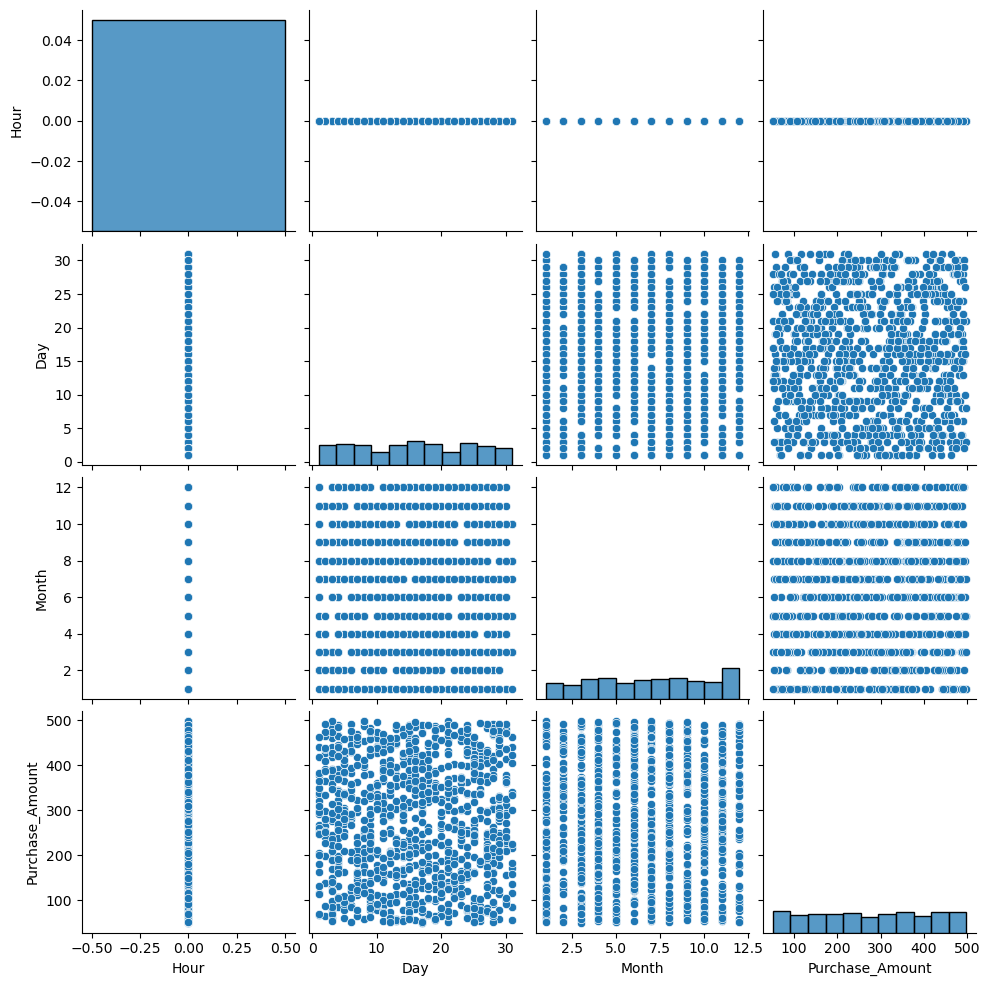

In [67]:
sns.pairplot(df[['Hour','Day','Month','Purchase_Amount']])
plt.show()

# **TOP 10 PRODUCT CATEGORIES BY TOTAL SALES**

/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_11445/3419554651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Purchase_Category', y='Purchase_Amount', palette='viridis')


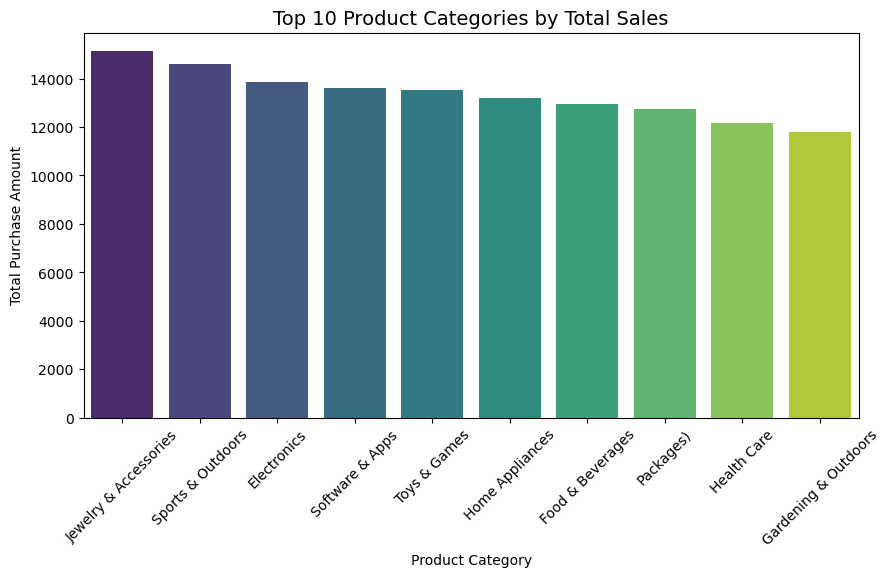

In [69]:
top_categories = (df.groupby('Purchase_Category')['Purchase_Amount']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .reset_index())
plt.figure(figsize=(10,5))
sns.barplot(data=top_categories, x='Purchase_Category', y='Purchase_Amount', palette='viridis')
plt.title('Top 10 Product Categories by Total Sales', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()


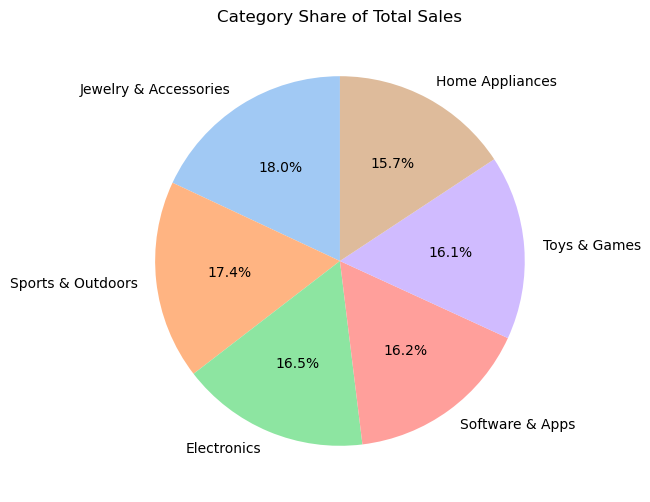

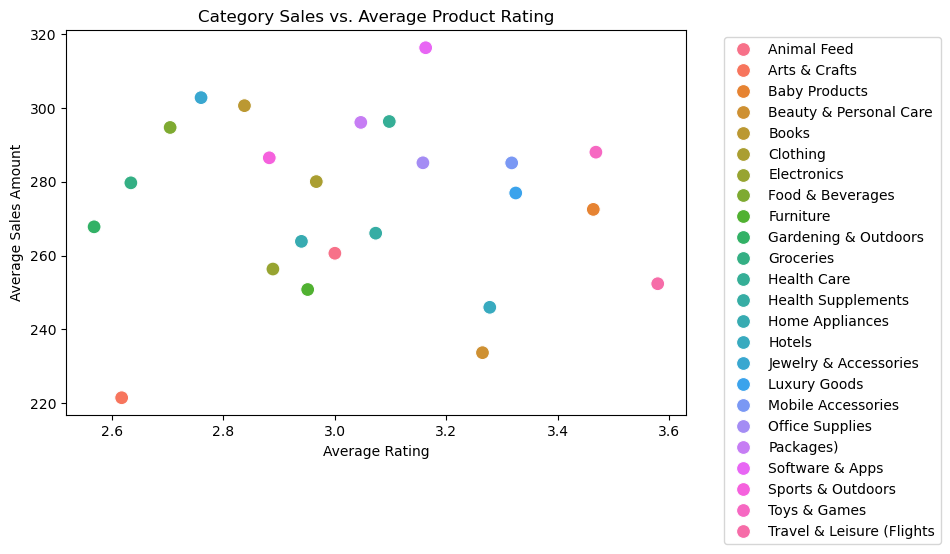

In [70]:
category_sales = df.groupby('Purchase_Category')['Purchase_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,6))
category_sales.head(6).plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Category Share of Total Sales')
plt.ylabel('')
plt.show()



cat_rating = df.groupby('Purchase_Category')[['Purchase_Amount','Product_Rating']].mean().reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(data=cat_rating, x='Product_Rating', y='Purchase_Amount', hue='Purchase_Category', s=100)
plt.title('Category Sales vs. Average Product Rating')
plt.xlabel('Average Rating')
plt.ylabel('Average Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **CUSTOMER PURCHASE FREQUENCY**

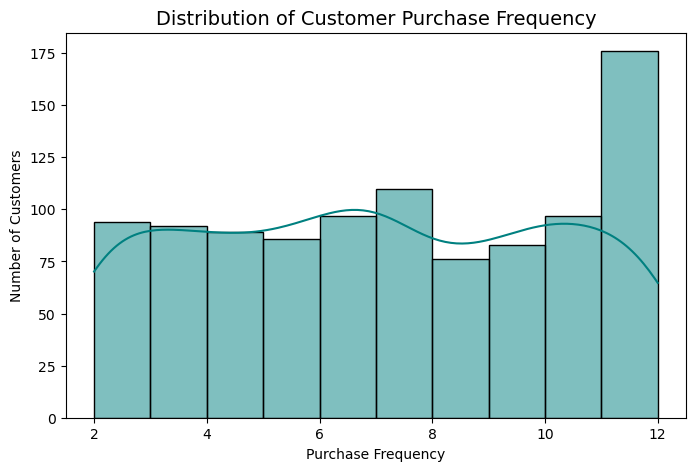

/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_11445/1792649454.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_spending, x='Frequency_of_Purchase', y='Purchase_Amount', palette='viridis')


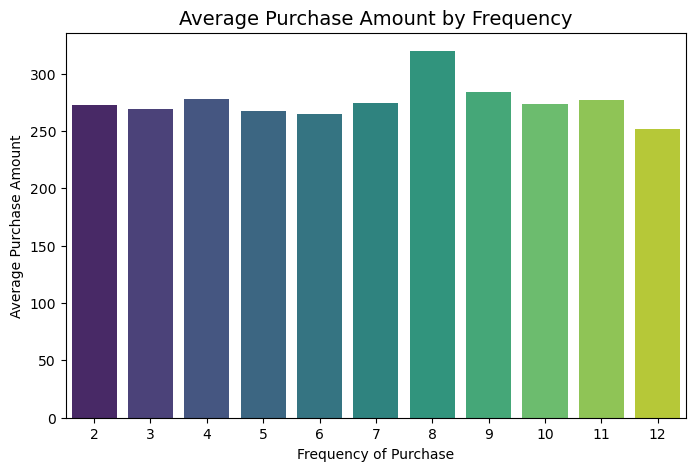

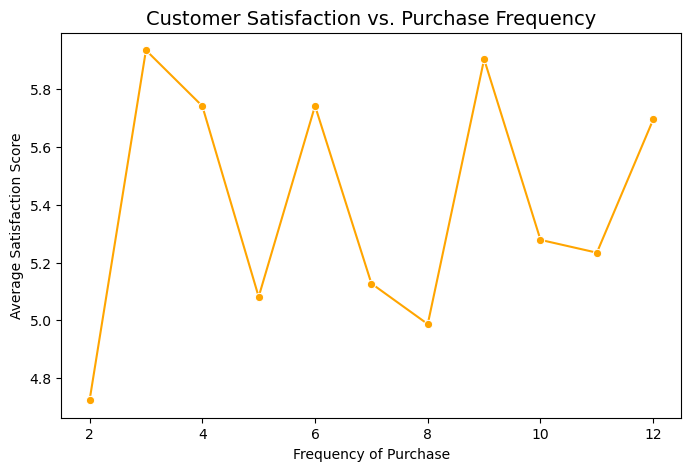

In [72]:
#DISTRIBUTION OF CUSTOMER PURCHASE FREQUENCY
plt.figure(figsize=(8,5))
sns.histplot(df['Frequency_of_Purchase'], bins=10, kde=True, color='teal')
plt.title('Distribution of Customer Purchase Frequency', fontsize=14)
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.show()

#AVERAGE PURCHASE AMOUNT BY FREQUENCY
freq_spending = df.groupby('Frequency_of_Purchase')['Purchase_Amount'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=freq_spending, x='Frequency_of_Purchase', y='Purchase_Amount', palette='viridis')
plt.title('Average Purchase Amount by Frequency', fontsize=14)
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Purchase Amount')
plt.show()

#CUSTOMER SATISFICATION V/S PURCHASE FREQUENCY
freq_satisfaction = df.groupby('Frequency_of_Purchase')['Customer_Satisfaction'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=freq_satisfaction, x='Frequency_of_Purchase', y='Customer_Satisfaction', marker='o', color='orange')
plt.title('Customer Satisfaction vs. Purchase Frequency', fontsize=14)
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Satisfaction Score')
plt.show()


# **ODER VALUE**

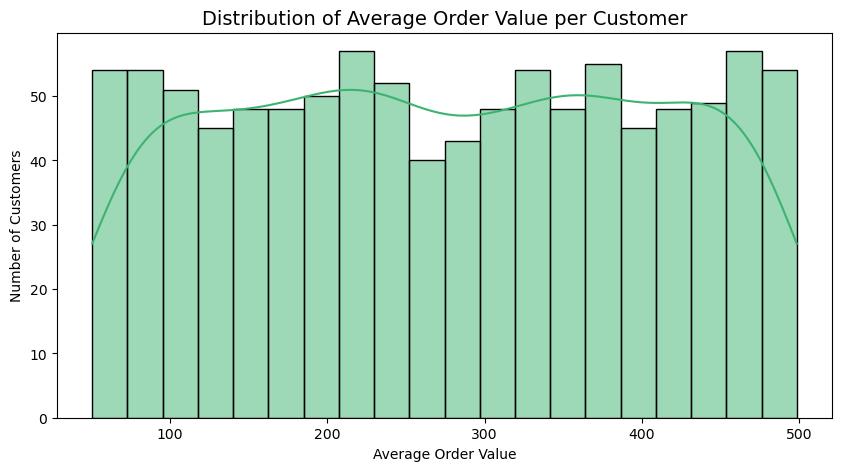

/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_11445/3935605012.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov_category, x='Purchase_Category', y='Purchase_Amount', palette='coolwarm')


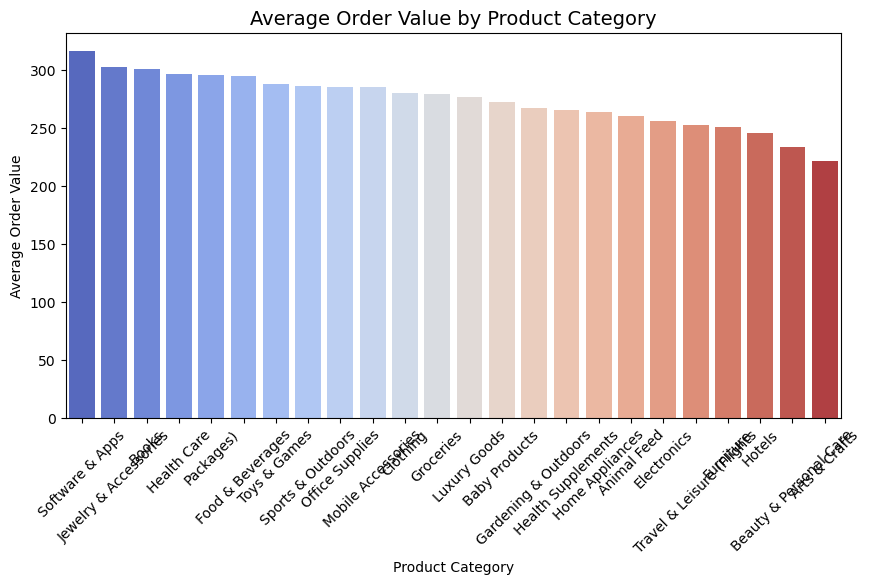

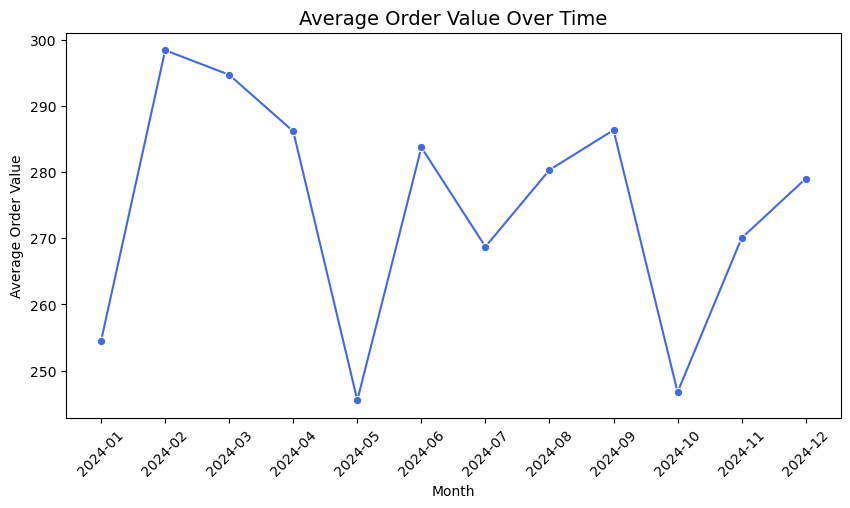

In [74]:
#ODER VALUE PER CUSTOMER

aov_customer = df.groupby('Customer_ID')['Purchase_Amount'].mean().reset_index()
aov_customer.rename(columns={'Purchase_Amount': 'Average_Order_Value'}, inplace=True)

plt.figure(figsize=(10,5))
sns.histplot(aov_customer['Average_Order_Value'], bins=20, kde=True, color='mediumseagreen')
plt.title('Distribution of Average Order Value per Customer', fontsize=14)
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.show()

#AVG VALUE BY PRODUCT CATEGORY

aov_category = df.groupby('Purchase_Category')['Purchase_Amount'].mean().reset_index()
aov_category = aov_category.sort_values(by='Purchase_Amount', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=aov_category, x='Purchase_Category', y='Purchase_Amount', palette='coolwarm')
plt.title('Average Order Value by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()

# Assuming Time_of_Purchase was converted to datetime earlier
aov_time = df.groupby(df['Time_of_Purchase'].dt.to_period('M'))['Purchase_Amount'].mean().reset_index()
aov_time['Time_of_Purchase'] = aov_time['Time_of_Purchase'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=aov_time, x='Time_of_Purchase', y='Purchase_Amount', marker='o', color='royalblue')
plt.title('Average Order Value Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.show()

In [75]:
df.head(5)

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Engagement_Score,High_Value_Customer,Overall_Satisfaction,Hour,Day,Month,Day_Name
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,2024-03-01,True,0,Need-based,No Preference,2,0.80,1,6.0,0,1,3,Friday
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,2024-04-16,True,0,Wants-based,Standard,6,1.40,0,3.0,0,16,4,Tuesday
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,2024-03-15,True,1,Impulsive,No Preference,3,0.72,1,6.0,0,15,3,Friday
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,2024-10-04,True,1,Need-based,Express,10,0.70,0,1.0,0,4,10,Friday
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,2024-01-30,False,0,Wants-based,No Preference,4,0.30,0,7.0,0,30,1,Tuesday


## Customer Segmentation For K-Means Clustring

### Dataset Description

In [138]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Engagement_Score,High_Value_Customer,Overall_Satisfaction,Hour,Day,Month,Day_Name,cluster,PCA1,PCA2
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,2024-03-01,True,0,Need-based,No Preference,2,0.80,1,6.0,0,1,3,Friday,3,1.025310,1.325680
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,2024-04-16,True,0,Wants-based,Standard,6,1.40,0,3.0,0,16,4,Tuesday,0,-0.993002,-1.180129
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,2024-03-15,True,1,Impulsive,No Preference,3,0.72,1,6.0,0,15,3,Friday,3,1.517169,1.685508
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,2024-10-04,True,1,Need-based,Express,10,0.70,0,1.0,0,4,10,Friday,1,-1.648327,-0.528307
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,2024-01-30,False,0,Wants-based,No Preference,4,0.30,0,7.0,0,30,1,Tuesday,1,-1.049277,1.701126


### Handling Missing Values

In [141]:
df.isna().sum()

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

In [143]:
df['Social_Media_Influence'].unique()

array([nan, 'Medium', 'Low', 'High'], dtype=object)

### Feature Selection

In [146]:
features = ['Age', 'Income_Level', 'Purchase_Amount','High_Value_Customer', 'Frequency_of_Purchase', 'Overall_Satisfaction']

In [148]:
X = df[features].copy()

In [150]:
X.head()

,Age,Income_Level,Purchase_Amount,High_Value_Customer,Frequency_of_Purchase,Overall_Satisfaction
0,22,Middle,333.80,1,4,6.0
1,49,High,222.22,0,11,3.0
2,24,Middle,426.22,1,2,6.0
3,29,Middle,101.31,0,6,1.0
4,33,Middle,211.70,0,6,7.0


### Encoding Categorical Variables

In [153]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Income_Level']

for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(df[col])


In [155]:
X.head()

,Age,Income_Level,Purchase_Amount,High_Value_Customer,Frequency_of_Purchase,Overall_Satisfaction
0,22,1,333.80,1,4,6.0
1,49,0,222.22,0,11,3.0
2,24,1,426.22,1,2,6.0
3,29,1,101.31,0,6,1.0
4,33,1,211.70,0,6,7.0


### Feature Scaling

In [158]:
from sklearn.preprocessing import StandardScaler

In [160]:
scaler = StandardScaler()

In [162]:
X_scaled = scaler.fit_transform(X)

In [164]:
X_scaled

array([[-1.31613845,  1.03046381,  0.4467739 ,  1.        , -0.93617277,
         1.13219213],
       [ 1.57200672, -0.97043679, -0.40195481, -1.        ,  1.28902566,
        -0.77171841],
       [-1.10220177,  1.03046381,  1.14976285,  1.        , -1.57194375,
         1.13219213],
       ...,
       [-0.88826509, -0.97043679,  1.35627822,  1.        ,  0.97114017,
        -0.45439998],
       [-1.42310679, -0.97043679, -1.28483653, -1.        ,  1.60691115,
         0.18023686],
       [-1.42310679,  1.03046381,  0.78655443,  1.        , -0.30040179,
         1.13219213]])

### Model Building

In [167]:
wcss = []

In [169]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

In [171]:
wcss

[4243.807184354062,
 3858.161247679025,
 3349.946777405631,
 3180.6869283468914,
 2934.6954404607154,
 2644.6030428982867,
 2481.7828993218645,
 2323.6300892965055]

Text(0, 0.5, 'wcss')

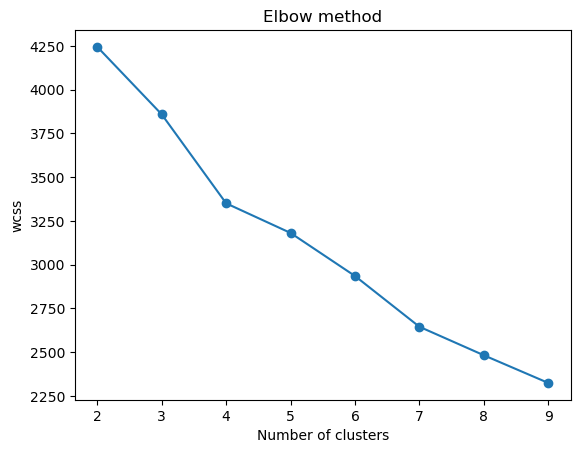

In [173]:
plt.plot(range(2, 10), wcss, marker = 'o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

### Cluster Analysis

In [176]:
kmeans = KMeans(n_clusters=4)
X['cluster'] = kmeans.fit_predict(X_scaled)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [178]:
X

,Age,Income_Level,Purchase_Amount,High_Value_Customer,Frequency_of_Purchase,Overall_Satisfaction,cluster
0,22,1,333.80,1,4,6.0,3
1,49,0,222.22,0,11,3.0,2
2,24,1,426.22,1,2,6.0,3
3,29,1,101.31,0,6,1.0,0
4,33,1,211.70,0,6,7.0,0
...,...,...,...,...,...,...,...
995,44,0,463.67,1,5,4.0,1
996,50,0,69.78,0,9,4.5,2
997,26,0,453.37,1,10,3.5,3
998,21,0,106.15,0,12,4.5,2


In [180]:
X['cluster']

0      3
1      2
2      3
3      0
4      0
      ..
995    1
996    2
997    3
998    2
999    3
Name: cluster, Length: 1000, dtype: int32

In [182]:
features

['Age',
 'Income_Level',
 'Purchase_Amount',
 'High_Value_Customer',
 'Frequency_of_Purchase',
 'Overall_Satisfaction']

In [184]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision,Engagement_Score,High_Value_Customer,Overall_Satisfaction,Hour,Day,Month,Day_Name,cluster,PCA1,PCA2
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,2024-03-01,True,0,Need-based,No Preference,2,0.80,1,6.0,0,1,3,Friday,1,1.025310,1.325680
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,2024-04-16,True,0,Wants-based,Standard,6,1.40,0,3.0,0,16,4,Tuesday,0,-0.993002,-1.180129
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,2024-03-15,True,1,Impulsive,No Preference,3,0.72,1,6.0,0,15,3,Friday,1,1.517169,1.685508
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,2024-10-04,True,1,Need-based,Express,10,0.70,0,1.0,0,4,10,Friday,0,-1.648327,-0.528307
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,2024-01-30,False,0,Wants-based,No Preference,4,0.30,0,7.0,0,30,1,Tuesday,0,-1.049277,1.701126


In [186]:
cluster_summary = X.groupby('cluster')[features].mean()

In [188]:
cluster_summary

,Age,Income_Level,Purchase_Amount,High_Value_Customer,Frequency_of_Purchase,Overall_Satisfaction
cluster,,,,,,
0,35.973180,0.498084,162.464866,0.0,4.325670,4.222222
1,41.847909,0.437262,382.691711,1.0,6.536122,4.199620
2,32.334728,0.472803,158.915314,0.0,9.769874,4.154812
3,26.080169,0.535865,396.758945,1.0,7.434599,4.289030


In [190]:
df['cluster'].value_counts()

cluster
0    499
2    189
1    184
3    128
Name: count, dtype: int64

### Dimensionality Reduction and Visualization

In [193]:
from sklearn.decomposition import PCA

In [195]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_data[:,0], pca_data[:, 1]

In [197]:
pca_data

array([[ 1.02530961,  1.32568042],
       [-0.99300154, -1.18012902],
       [ 1.51716946,  1.68550796],
       ...,
       [ 1.68168085, -1.56788466],
       [-1.59086259, -1.69105847],
       [ 1.26998206,  0.9904651 ]])

Text(0.5, 1.0, 'Constumer Segmentation PCA')

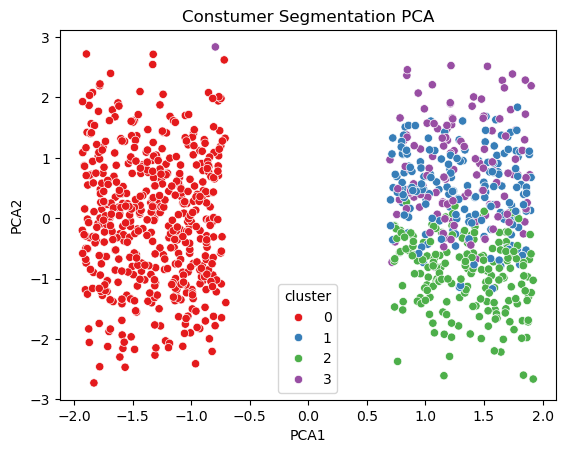

In [199]:

sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = df, palette='Set1')
plt.title('Constumer Segmentation PCA')

In [201]:
cluster_summary

,Age,Income_Level,Purchase_Amount,High_Value_Customer,Frequency_of_Purchase,Overall_Satisfaction
cluster,,,,,,
0,35.973180,0.498084,162.464866,0.0,4.325670,4.222222
1,41.847909,0.437262,382.691711,1.0,6.536122,4.199620
2,32.334728,0.472803,158.915314,0.0,9.769874,4.154812
3,26.080169,0.535865,396.758945,1.0,7.434599,4.289030


### Model Deployment

In [204]:
import joblib
joblib.dump(kmeans,"kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

### XGBOOST Model Building

Confusion Matrix:
 [[ 93   0]
 [  0 107]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       107

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy Score: 1.0


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:47:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/var/folders/cc/8f3096fx0tqg7jt1yfsx80c00000gn/T/ipykernel_11445/4196272938.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


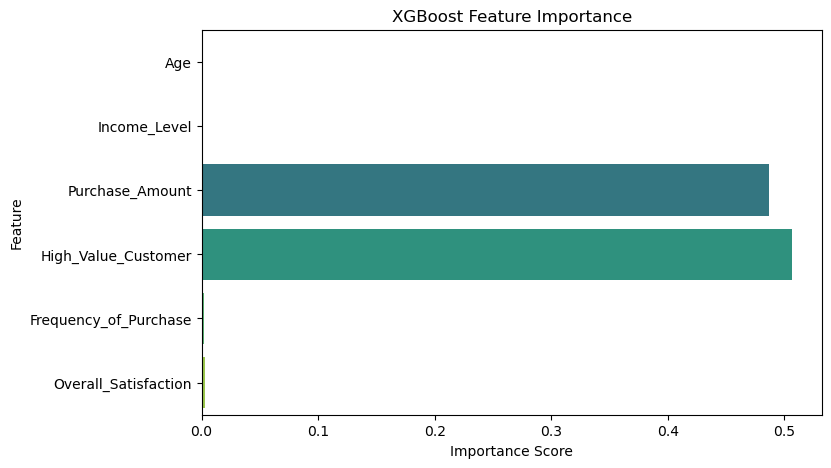

['xgb_model.pkl']

In [207]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Define target variable
y = df['High_Value_Customer']

# Features (reuse scaled features from before)
X = X_scaled

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

### Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(
    x=xgb_model.feature_importances_,
    y=features,
    palette="viridis"
)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### Save XGBoost Model
import joblib

joblib.dump(xgb_model, "xgb_model.pkl")



